In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics

In [7]:
dataset=pd.read_csv('credit-default.csv')

In [8]:
dataset.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [9]:
dataset.describe()

,months_loan_duration,amount,installment_rate,residence_history,age,existing_credits,default,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.300000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.458487,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [11]:
dataset.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_length', 'installment_rate',
       'personal_status', 'other_debtors', 'residence_history', 'property',
       'age', 'installment_plan', 'housing', 'existing_credits', 'default',
       'dependents', 'telephone', 'foreign_worker', 'job'],
      dtype='object')

In [12]:
dataset['credit_history']

0      critical
1        repaid
2      critical
3        repaid
4       delayed
         ...   
995      repaid
996      repaid
997      repaid
998      repaid
999    critical
Name: credit_history, Length: 1000, dtype: object

In [14]:
#to get records with months_loan_duration greater than 1 year
dataset[dataset['months_loan_duration']>12]

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee
5,unknown,36,repaid,education,9055,unknown,1 - 4 yrs,2,single male,none,...,unknown/none,35,none,for free,1,1,2,yes,yes,unskilled resident
6,unknown,24,repaid,furniture,2835,501 - 1000 DM,> 7 yrs,3,single male,none,...,building society savings,53,none,own,1,1,1,none,yes,skilled employee
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,< 0 DM,18,repaid,radio/tv,1936,unknown,4 - 7 yrs,2,married male,none,...,other,23,none,rent,2,1,1,none,yes,unskilled resident
993,< 0 DM,36,repaid,furniture,3959,< 100 DM,unemployed,4,single male,none,...,building society savings,30,none,own,1,1,1,yes,yes,mangement self-employed
996,< 0 DM,30,repaid,car (used),3857,< 100 DM,1 - 4 yrs,4,divorced male,none,...,building society savings,40,none,own,1,1,1,yes,yes,mangement self-employed
998,< 0 DM,45,repaid,radio/tv,1845,< 100 DM,1 - 4 yrs,4,single male,none,...,unknown/none,23,none,for free,1,2,1,yes,yes,skilled employee


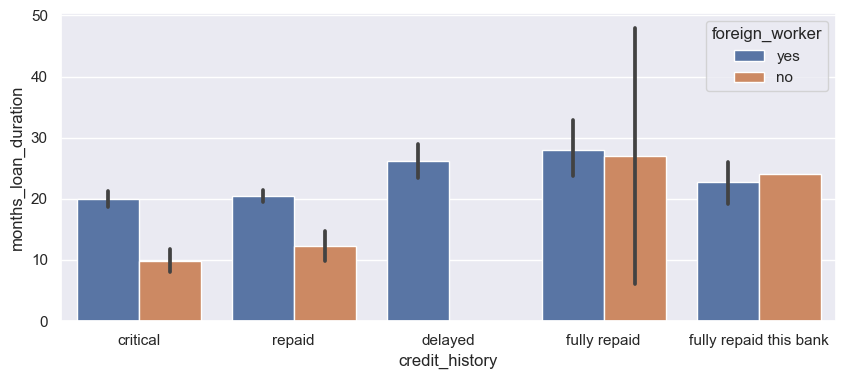

In [22]:
#how the average 'months_loan_duration' varies across  'credit_history' and  how this relationship is influenced by the foreign_worker
# lines represent the confidence interval around the mean
sns.set(rc={'figure.figsize':(10,4)})
sns.barplot(x='credit_history',y='months_loan_duration',data=dataset,hue='foreign_worker')
plt.show()

In [23]:
#to get how many single male have repaid loan
dataset[(dataset['personal_status']=='single male') & (dataset['credit_history']=='repaid')]

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
5,unknown,36,repaid,education,9055,unknown,1 - 4 yrs,2,single male,none,...,unknown/none,35,none,for free,1,1,2,yes,yes,unskilled resident
6,unknown,24,repaid,furniture,2835,501 - 1000 DM,> 7 yrs,3,single male,none,...,building society savings,53,none,own,1,1,1,none,yes,skilled employee
7,1 - 200 DM,36,repaid,car (used),6948,< 100 DM,1 - 4 yrs,2,single male,none,...,other,35,none,rent,1,1,1,yes,yes,mangement self-employed
19,unknown,24,repaid,radio/tv,3430,501 - 1000 DM,> 7 yrs,3,single male,none,...,other,31,none,own,1,1,2,yes,yes,skilled employee
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,< 0 DM,24,repaid,car (used),6579,< 100 DM,unemployed,4,single male,none,...,unknown/none,29,none,for free,1,1,1,yes,yes,mangement self-employed
993,< 0 DM,36,repaid,furniture,3959,< 100 DM,unemployed,4,single male,none,...,building society savings,30,none,own,1,1,1,yes,yes,mangement self-employed
994,unknown,12,repaid,car (new),2390,unknown,> 7 yrs,4,single male,none,...,other,50,none,own,1,1,1,yes,yes,skilled employee
997,unknown,12,repaid,radio/tv,804,< 100 DM,> 7 yrs,4,single male,none,...,other,38,none,own,1,1,1,none,yes,skilled employee


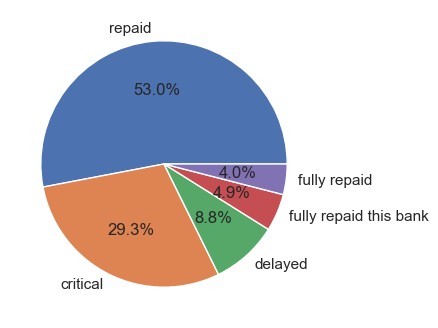

In [37]:
#to know how count for each credit_history
plt.pie(list(dataset['credit_history'].value_counts()),labels=dataset['credit_history'].value_counts().keys(),autopct='%0.1f%%')
plt.show()

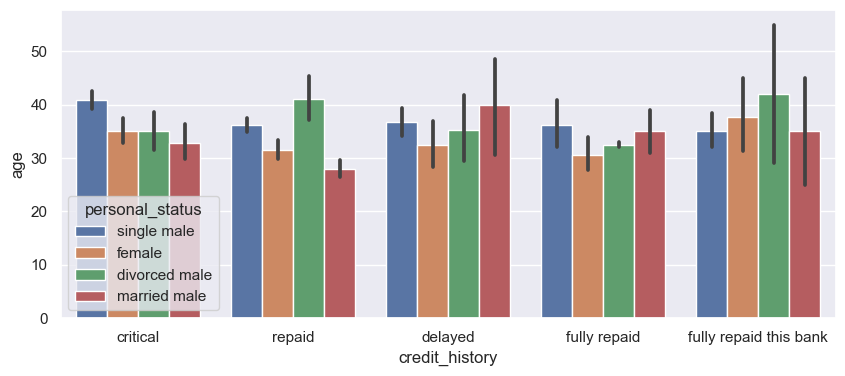

In [38]:
#analysis of credit_history with age grouped by personal_status
sns.set(rc={'figure.figsize':(10,4)})
sns.barplot(x='credit_history',y='age',data=dataset,hue='personal_status')
plt.show()

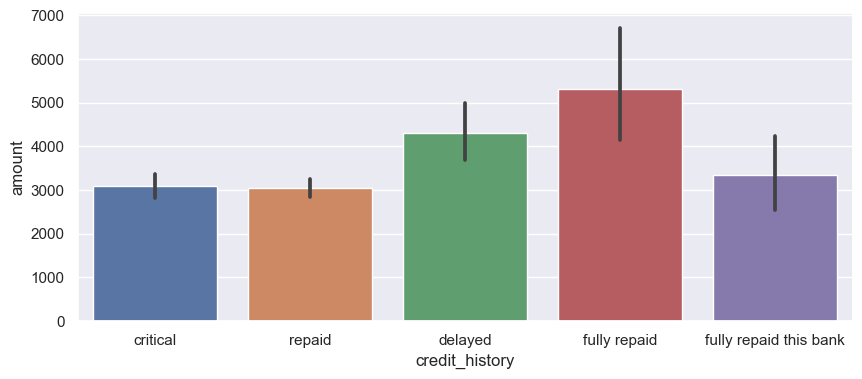

In [45]:
#barplot credit_history v/s amount
sns.barplot(x='credit_history',y='amount',data=dataset)
plt.show()

In [54]:
#to get records where amount >5000 is critical
dataset[(dataset['amount']>5000) & (dataset['credit_history']=='critical')]

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
9,1 - 200 DM,30,critical,car (new),5234,< 100 DM,unemployed,4,married male,none,...,other,28,none,own,2,2,1,none,yes,mangement self-employed
36,unknown,48,critical,education,6110,< 100 DM,1 - 4 yrs,1,single male,none,...,unknown/none,31,bank,for free,1,1,1,yes,yes,skilled employee
43,< 0 DM,30,critical,car (used),6187,101 - 500 DM,4 - 7 yrs,1,married male,none,...,other,24,none,rent,2,1,1,none,yes,skilled employee
44,< 0 DM,48,critical,car (used),6143,< 100 DM,> 7 yrs,4,female,none,...,unknown/none,58,stores,for free,2,2,1,none,yes,unskilled resident
48,unknown,11,critical,car (new),7228,< 100 DM,1 - 4 yrs,1,single male,none,...,building society savings,39,none,own,2,1,1,none,yes,unskilled resident
57,unknown,36,critical,radio/tv,9566,< 100 DM,1 - 4 yrs,2,female,none,...,other,31,stores,own,2,1,1,none,yes,skilled employee
59,< 0 DM,36,critical,furniture,6229,< 100 DM,0 - 1 yrs,4,female,co-applicant,...,unknown/none,23,none,rent,2,2,1,yes,yes,unskilled resident
73,1 - 200 DM,42,critical,business,5954,< 100 DM,4 - 7 yrs,2,female,none,...,real estate,41,bank,own,2,1,1,none,yes,unskilled resident
105,1 - 200 DM,24,critical,others,11938,< 100 DM,1 - 4 yrs,2,single male,co-applicant,...,other,39,none,own,2,2,2,yes,yes,mangement self-employed
113,unknown,36,critical,car (new),7855,< 100 DM,1 - 4 yrs,4,female,none,...,real estate,25,stores,own,2,2,1,yes,yes,skilled employee


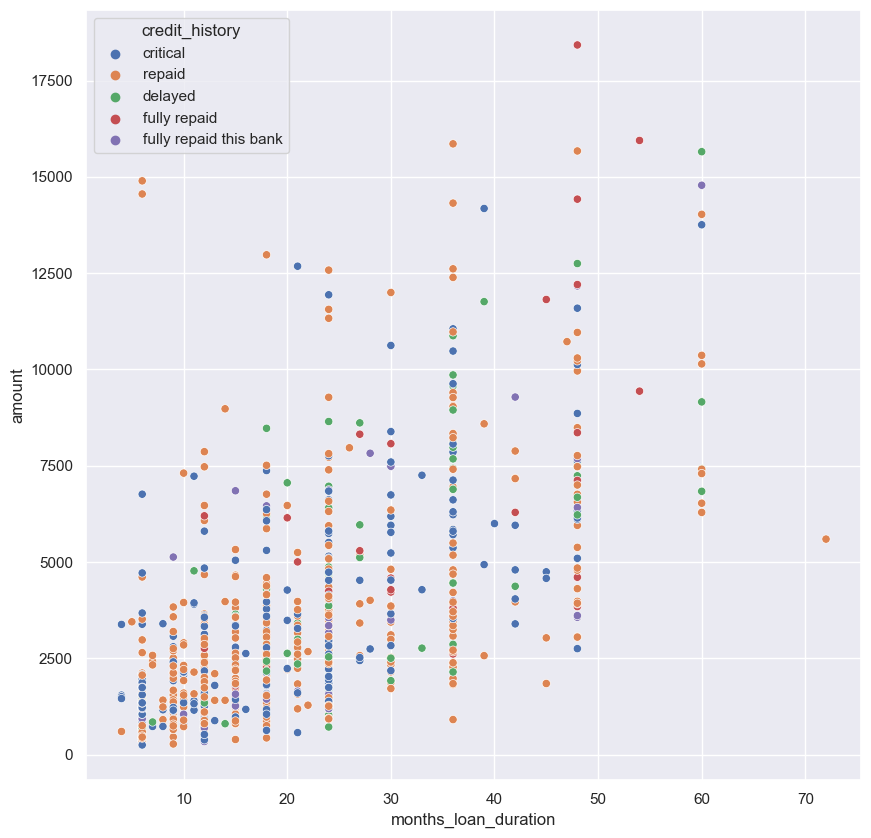

In [62]:
sns.set(rc={'figure.figsize':(10,10)})
sns.scatterplot(x='months_loan_duration',y='amount',data=dataset,hue='credit_history')
plt.show()

In [69]:
#to get records where credit_history is critical and we dont have telephone
dataset[(dataset['credit_history']=='critical') & (dataset['telephone']=='none')]

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
9,1 - 200 DM,30,critical,car (new),5234,< 100 DM,unemployed,4,married male,none,...,other,28,none,own,2,2,1,none,yes,mangement self-employed
13,< 0 DM,24,critical,car (new),1199,< 100 DM,> 7 yrs,4,single male,none,...,other,60,none,own,2,2,1,none,yes,unskilled resident
16,unknown,24,critical,radio/tv,2424,unknown,> 7 yrs,4,single male,none,...,building society savings,53,none,own,2,1,1,none,yes,skilled employee
22,< 0 DM,10,critical,car (new),2241,< 100 DM,0 - 1 yrs,1,single male,none,...,real estate,48,none,rent,2,1,2,none,no,unskilled resident
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,unknown,24,critical,furniture,2028,< 100 DM,4 - 7 yrs,2,single male,none,...,building society savings,30,none,own,2,1,1,none,yes,unskilled resident
985,< 0 DM,15,critical,furniture,1433,< 100 DM,1 - 4 yrs,4,female,none,...,building society savings,25,none,rent,2,1,1,none,yes,skilled employee
989,1 - 200 DM,24,critical,radio/tv,1743,< 100 DM,> 7 yrs,4,single male,none,...,building society savings,48,none,own,2,1,1,none,yes,unskilled resident
990,unknown,12,critical,education,3565,unknown,0 - 1 yrs,2,single male,none,...,building society savings,37,none,own,2,1,2,none,yes,unskilled resident


In [70]:
#to get records where person is unemployed and credit history is critical 
dataset[(dataset['credit_history']=='critical') & (dataset['employment_length']=='unemployed')]

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
9,1 - 200 DM,30,critical,car (new),5234,< 100 DM,unemployed,4,married male,none,...,other,28,none,own,2,2,1,none,yes,mangement self-employed
128,1 - 200 DM,12,critical,car (used),1860,< 100 DM,unemployed,4,single male,none,...,other,34,none,own,2,1,1,yes,yes,mangement self-employed
187,1 - 200 DM,16,critical,car (new),1175,< 100 DM,unemployed,2,single male,none,...,other,68,none,for free,3,1,1,yes,yes,unemployed non-resident
259,unknown,11,critical,radio/tv,1154,101 - 500 DM,unemployed,4,female,none,...,real estate,57,none,own,3,1,1,none,yes,unskilled resident
320,1 - 200 DM,30,critical,car (new),4249,< 100 DM,unemployed,4,married male,none,...,other,28,none,own,2,2,1,none,yes,mangement self-employed
330,< 0 DM,24,critical,car (used),6615,< 100 DM,unemployed,2,single male,none,...,unknown/none,75,none,for free,2,1,1,yes,yes,mangement self-employed
352,unknown,18,critical,car (used),3229,unknown,unemployed,2,single male,none,...,unknown/none,38,none,own,1,1,1,yes,yes,mangement self-employed
387,1 - 200 DM,18,critical,furniture,7374,< 100 DM,unemployed,4,single male,none,...,building society savings,40,stores,own,2,1,1,yes,yes,mangement self-employed
394,unknown,9,critical,furniture,2406,< 100 DM,unemployed,2,single male,none,...,other,31,none,own,1,1,1,none,yes,mangement self-employed
412,unknown,12,critical,business,2292,< 100 DM,unemployed,4,single male,none,...,other,42,stores,own,2,2,1,yes,yes,mangement self-employed


In [72]:
#records where credit history is critical and there are other debtors
dataset[(dataset['credit_history']=='critical') & (dataset['other_debtors']!='none')]

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
59,< 0 DM,36,critical,furniture,6229,< 100 DM,0 - 1 yrs,4,female,co-applicant,...,unknown/none,23,none,rent,2,2,1,yes,yes,unskilled resident
61,1 - 200 DM,15,critical,radio/tv,1537,unknown,> 7 yrs,4,single male,guarantor,...,real estate,50,none,own,2,1,1,yes,yes,skilled employee
85,unknown,12,critical,business,1412,< 100 DM,1 - 4 yrs,4,female,guarantor,...,real estate,29,none,own,2,1,1,yes,yes,mangement self-employed
93,> 200 DM,24,critical,furniture,3617,unknown,> 7 yrs,4,single male,co-applicant,...,unknown/none,20,none,rent,2,1,1,none,yes,skilled employee
105,1 - 200 DM,24,critical,others,11938,< 100 DM,1 - 4 yrs,2,single male,co-applicant,...,other,39,none,own,2,2,2,yes,yes,mangement self-employed
117,< 0 DM,10,critical,furniture,2132,unknown,0 - 1 yrs,2,female,co-applicant,...,real estate,27,none,rent,2,1,1,none,no,skilled employee
129,< 0 DM,12,critical,car (new),3499,< 100 DM,1 - 4 yrs,3,female,co-applicant,...,real estate,29,none,own,2,2,1,none,yes,skilled employee
138,1 - 200 DM,15,critical,radio/tv,2728,unknown,4 - 7 yrs,4,single male,guarantor,...,real estate,35,bank,own,3,1,1,yes,yes,skilled employee
148,< 0 DM,36,critical,furniture,5371,< 100 DM,1 - 4 yrs,3,single male,guarantor,...,building society savings,28,none,own,2,1,1,none,yes,skilled employee
156,< 0 DM,9,critical,repairs,1288,101 - 500 DM,> 7 yrs,3,single male,guarantor,...,real estate,48,none,own,2,1,2,none,no,skilled employee


In [77]:
#records where person own house and take loan for new car
dataset[(dataset['purpose']=='car (new)') & (dataset['housing']=='own')]

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
9,1 - 200 DM,30,critical,car (new),5234,< 100 DM,unemployed,4,married male,none,...,other,28,none,own,2,2,1,none,yes,mangement self-employed
13,< 0 DM,24,critical,car (new),1199,< 100 DM,> 7 yrs,4,single male,none,...,other,60,none,own,2,2,1,none,yes,unskilled resident
20,unknown,9,critical,car (new),2134,< 100 DM,1 - 4 yrs,4,single male,none,...,other,48,none,own,3,1,1,yes,yes,skilled employee
32,1 - 200 DM,18,repaid,car (new),5866,101 - 500 DM,1 - 4 yrs,2,single male,none,...,other,30,none,own,2,1,1,yes,yes,skilled employee
45,unknown,11,critical,car (new),1393,< 100 DM,0 - 1 yrs,4,female,none,...,other,35,none,own,2,1,1,none,yes,mangement self-employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,< 0 DM,11,critical,car (new),3939,< 100 DM,1 - 4 yrs,1,single male,none,...,real estate,40,none,own,2,1,2,none,yes,unskilled resident
971,unknown,24,repaid,car (new),7393,< 100 DM,1 - 4 yrs,1,single male,none,...,building society savings,43,none,own,1,1,2,none,yes,unskilled resident
978,unknown,24,delayed,car (new),2538,< 100 DM,> 7 yrs,4,single male,none,...,other,47,none,own,2,2,2,none,yes,unskilled resident
982,> 200 DM,21,repaid,car (new),2923,101 - 500 DM,1 - 4 yrs,1,female,none,...,other,28,bank,own,1,1,1,yes,yes,mangement self-employed


In [78]:
#records with age>30 and credit_history is delayed
dataset[(dataset['age']>30) & (dataset['credit_history']=='delayed')]

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee
29,< 0 DM,60,delayed,business,6836,< 100 DM,> 7 yrs,3,single male,none,...,unknown/none,63,none,own,2,2,1,yes,yes,skilled employee
42,1 - 200 DM,18,delayed,repairs,6204,< 100 DM,1 - 4 yrs,2,single male,none,...,real estate,44,none,own,1,1,2,yes,yes,unskilled resident
54,1 - 200 DM,36,delayed,car (new),2225,< 100 DM,> 7 yrs,4,single male,none,...,unknown/none,57,bank,for free,2,2,1,yes,yes,skilled employee
77,1 - 200 DM,11,delayed,radio/tv,4771,< 100 DM,4 - 7 yrs,2,single male,none,...,building society savings,51,none,own,1,1,1,none,yes,skilled employee
99,1 - 200 DM,20,delayed,car (used),7057,unknown,4 - 7 yrs,3,single male,none,...,building society savings,36,bank,rent,2,1,2,yes,yes,mangement self-employed
110,1 - 200 DM,6,delayed,business,1449,101 - 500 DM,> 7 yrs,1,divorced male,none,...,other,31,bank,own,2,1,2,none,yes,skilled employee
154,1 - 200 DM,24,delayed,business,6967,101 - 500 DM,4 - 7 yrs,4,single male,none,...,other,36,none,rent,1,1,1,yes,yes,mangement self-employed
172,1 - 200 DM,24,delayed,furniture,2064,< 100 DM,unemployed,3,female,none,...,building society savings,34,none,own,1,2,1,yes,yes,mangement self-employed
199,1 - 200 DM,18,delayed,furniture,4297,< 100 DM,> 7 yrs,4,divorced male,none,...,unknown/none,40,none,own,1,2,1,yes,yes,mangement self-employed


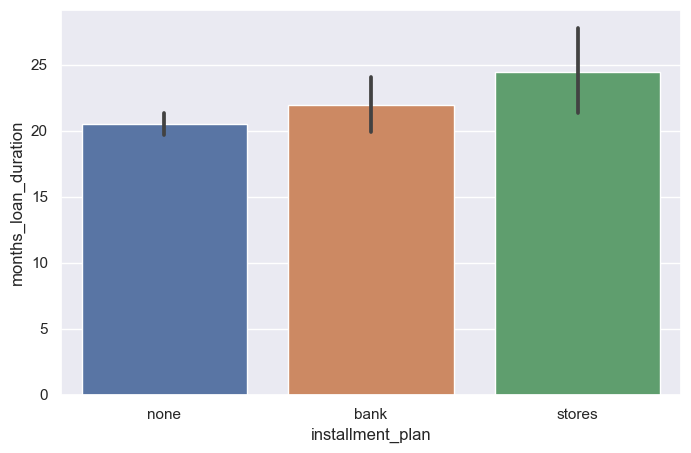

In [84]:
#installment plan v/s months_loan_duration
sns.set(rc={'figure.figsize':(8,5)})
sns.barplot(x='installment_plan',y='months_loan_duration',data=dataset)
plt.show()

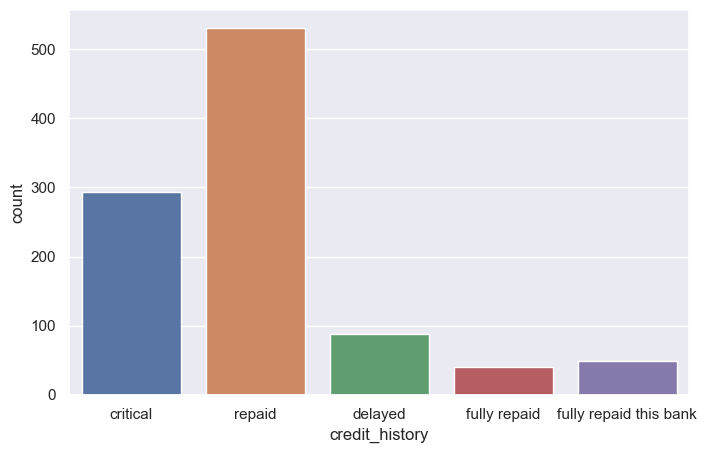

In [91]:
#to get graphical view of count of each credit history
sns.countplot(x='credit_history',data=dataset)
plt.show()

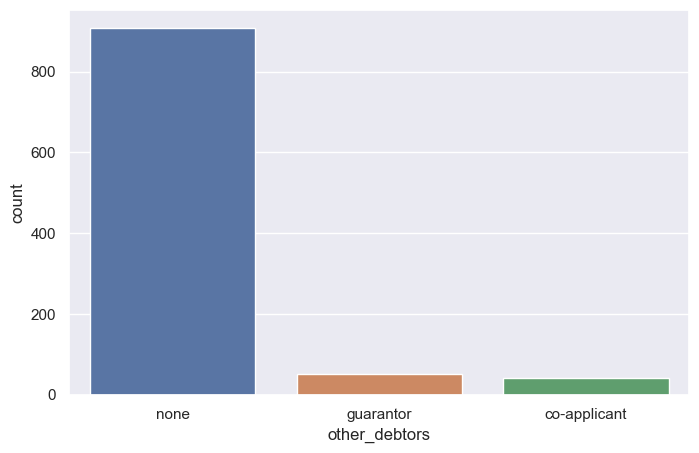

In [90]:
sns.countplot(x='other_debtors',data=dataset)
plt.show()

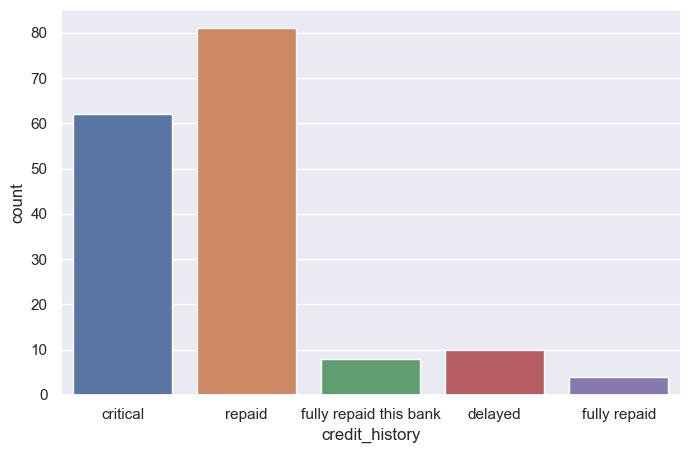

In [97]:
#credit history countplot for records having their own house and taking loan for new car
sns.countplot(x='credit_history', data=dataset[(dataset['purpose']=='car (new)') & (dataset['housing']=='own')])
plt.show()

In [100]:
# to find relationship between two categorical value
#Normalizes the result along the rows, providing proportions within each row. This means each row will sum to 1, representing the relative distribution of 'savings_balance' categories for each 'checking_balance' category.
pd.crosstab(dataset['checking_balance'],dataset['savings_balance'],normalize='index').round(2)

savings_balance,101 - 500 DM,501 - 1000 DM,< 100 DM,> 1000 DM,unknown
checking_balance,,,,,
1 - 200 DM,0.17,0.04,0.57,0.05,0.17
< 0 DM,0.04,0.03,0.80,0.02,0.11
> 200 DM,0.08,0.06,0.65,0.05,0.16
unknown,0.10,0.10,0.48,0.06,0.25


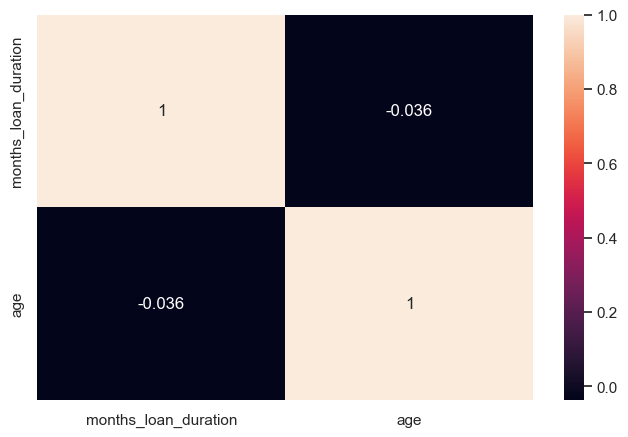

In [103]:
#gives correlation matrix
#annot -->adds numerical val
#values are in the range of -1 to 1, where:
#1: Perfect positive correlation
#0: No correlation
#-1: Perfect negative correlation
sns.heatmap(dataset[['months_loan_duration','age']].corr(),annot=True)
plt.show()

In [104]:
#to check for numm val in column
dataset.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_length       0
installment_rate        0
personal_status         0
other_debtors           0
residence_history       0
property                0
age                     0
installment_plan        0
housing                 0
existing_credits        0
default                 0
dependents              0
telephone               0
foreign_worker          0
job                     0
dtype: int64

<Axes: xlabel='credit_history', ylabel='months_loan_duration'>

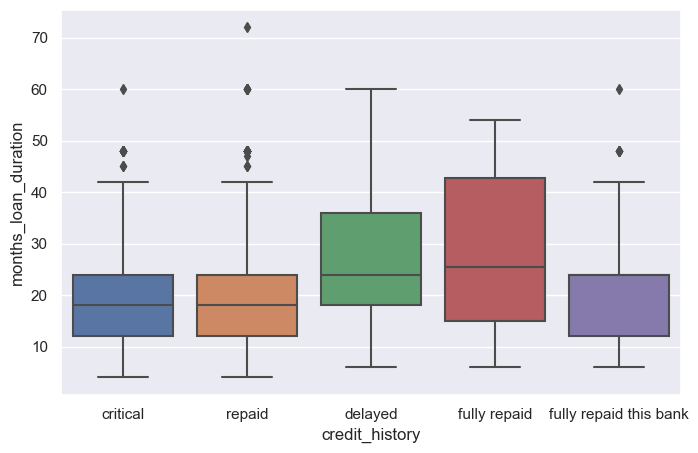

In [106]:
sns.boxplot(x='credit_history',y='months_loan_duration',data=dataset)

In [112]:
#to remove outliers just keep interquartile range
#IQR=Inter Quartile Range
#ll: Lower Limit
#UL:Upper Limit
Q1,Q3=dataset['months_loan_duration'].quantile([.25,.75])
IQR=Q3-Q1
LL=Q1 - 1.5*(IQR)
UL=Q3 + 1.5*(IQR)

In [109]:
UL

42.0

In [114]:
#to get records having months_loan_duration greater than upper limit
#outliers are generally exception
outlier=dataset[dataset['months_loan_duration']>UL]

In [115]:
outlier

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
11,< 0 DM,48,repaid,business,4308,< 100 DM,0 - 1 yrs,3,female,none,...,building society savings,24,none,rent,1,2,1,none,yes,skilled employee
29,< 0 DM,60,delayed,business,6836,< 100 DM,> 7 yrs,3,single male,none,...,unknown/none,63,none,own,2,2,1,yes,yes,skilled employee
35,1 - 200 DM,45,critical,radio/tv,4746,< 100 DM,0 - 1 yrs,4,single male,none,...,building society savings,25,none,own,2,2,1,none,yes,unskilled resident
36,unknown,48,critical,education,6110,< 100 DM,1 - 4 yrs,1,single male,none,...,unknown/none,31,bank,for free,1,1,1,yes,yes,skilled employee
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,1 - 200 DM,48,fully repaid,car (new),8358,501 - 1000 DM,0 - 1 yrs,1,female,none,...,other,30,none,own,2,1,1,none,yes,skilled employee
973,< 0 DM,60,repaid,business,7297,< 100 DM,> 7 yrs,4,single male,co-applicant,...,unknown/none,36,none,rent,1,2,1,none,yes,skilled employee
981,unknown,48,repaid,business,4844,< 100 DM,unemployed,3,single male,none,...,other,33,bank,rent,1,2,1,yes,yes,mangement self-employed
998,< 0 DM,45,repaid,radio/tv,1845,< 100 DM,1 - 4 yrs,4,single male,none,...,unknown/none,23,none,for free,1,2,1,yes,yes,skilled employee


In [116]:
#to get number of outliers
outlier['credit_history'].count()

70

In [120]:
#we got 70 outliers

In [124]:
dataset['credit_history'].value_counts(normalize=True)

credit_history
repaid                    0.530
critical                  0.293
delayed                   0.088
fully repaid this bank    0.049
fully repaid              0.040
Name: proportion, dtype: float64

In [125]:
outlier['credit_history'].value_counts(normalize=True)

credit_history
repaid                    0.457143
critical                  0.185714
fully repaid              0.142857
delayed                   0.128571
fully repaid this bank    0.085714
Name: proportion, dtype: float64

In [126]:
#in outliers we have more percent of delayed,fully repaid,fully repaid to this bank

In [127]:
#as we can't remove outliers....set it to max value

In [128]:
#where val is greater than UL ...set it to UL
dataset['months_loan_duration']=np.where(dataset['months_loan_duration']>UL,UL,dataset['months_loan_duration'])

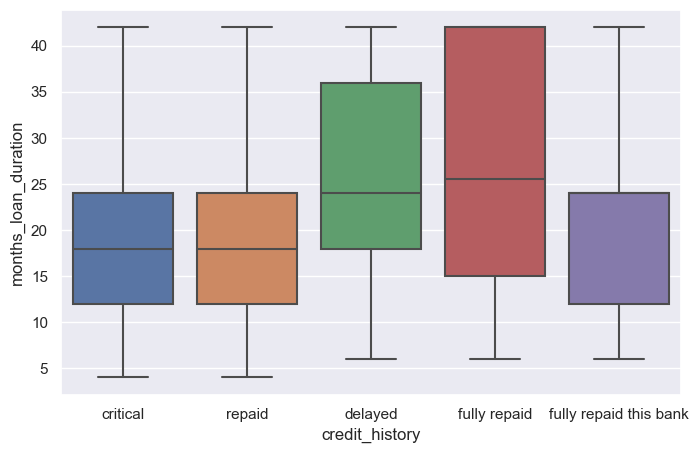

In [130]:
sns.boxplot(x='credit_history',y='months_loan_duration',data=dataset)
plt.show()

In [131]:
#we have successfully removed all outliers

In [132]:
#converting categorical column to numerical value

In [142]:
dataset=pd.get_dummies(dataset,drop_first=True).astype(int)

In [143]:
dataset.head()

,months_loan_duration,amount,installment_rate,residence_history,age,existing_credits,default,dependents,checking_balance_< 0 DM,checking_balance_> 200 DM,...,property_unknown/none,installment_plan_none,installment_plan_stores,housing_own,housing_rent,telephone_yes,foreign_worker_yes,job_skilled employee,job_unemployed non-resident,job_unskilled resident
0,6,1169,4,4,67,2,1,1,1,0,...,0,1,0,1,0,1,1,1,0,0
1,42,5951,2,2,22,1,2,1,0,0,...,0,1,0,1,0,0,1,1,0,0
2,12,2096,2,3,49,1,1,2,0,0,...,0,1,0,1,0,0,1,0,0,1
3,42,7882,2,4,45,1,1,2,1,0,...,0,1,0,0,0,0,1,1,0,0
4,24,4870,3,4,53,2,2,2,1,0,...,1,1,0,0,0,0,1,1,0,0


In [144]:
dataset.columns

Index(['months_loan_duration', 'amount', 'installment_rate',
       'residence_history', 'age', 'existing_credits', 'default', 'dependents',
       'checking_balance_< 0 DM', 'checking_balance_> 200 DM',
       'checking_balance_unknown', 'credit_history_delayed',
       'credit_history_fully repaid', 'credit_history_fully repaid this bank',
       'credit_history_repaid', 'purpose_car (new)', 'purpose_car (used)',
       'purpose_domestic appliances', 'purpose_education', 'purpose_furniture',
       'purpose_others', 'purpose_radio/tv', 'purpose_repairs',
       'purpose_retraining', 'savings_balance_501 - 1000 DM',
       'savings_balance_< 100 DM', 'savings_balance_> 1000 DM',
       'savings_balance_unknown', 'employment_length_1 - 4 yrs',
       'employment_length_4 - 7 yrs', 'employment_length_> 7 yrs',
       'employment_length_unemployed', 'personal_status_female',
       'personal_status_married male', 'personal_status_single male',
       'other_debtors_guarantor', 'other_deb

In [140]:
#*********LOGISTIC REGRESSION***************

In [141]:
from sklearn.model_selection import train_test_split

In [145]:
#to get independent var
# all col except default
x=dataset.drop('default',axis=1)

In [147]:
#dependent var
y=dataset['default']

In [159]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y)

In [160]:
#stratify =y i.e yes means number of defaulters in training set and testing set will be same

In [161]:
x_train.shape

(700, 48)

In [162]:
x_test.shape

(300, 48)

In [163]:
#if categories are imbalanced in predictions will be problematic 
#to avod this we use SMOTE(Synthetic Minority Oversampling Technique)
#when we have less val we can oversample by adding dummy val
#from imblearn.over_sampling import SMOTE

In [164]:
#import logistic regression
from sklearn.linear_model import LogisticRegression

In [188]:
#create instance of logistic regression
lr1=LogisticRegression()

In [189]:
#fit model on training datatset
#warning:logistic regression model, trained on training dataset, did not converge within the specified maximum number of iterations
#we have to increase number of iterations
lr1.fit(x_train,y_train)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [193]:
lr=LogisticRegression(max_iter=1000)

In [192]:
lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [170]:
y_predict=lr.predict(x_test)

In [171]:
y_test.head()

84     1
929    1
580    2
301    2
460    1
Name: default, dtype: int32

In [172]:
y_predict[0:5]

array([1, 1, 1, 2, 1])

In [174]:
#to get confusion matrix
from sklearn.metrics import confusion_matrix,classification_report

In [175]:
confusion_matrix(y_test,y_predict)

array([[186,  24],
       [ 46,  44]], dtype=int64)

In [176]:
# right diagonal gives correctly classified val

In [177]:
# left diagonal gives incorrectly classified val

In [ ]:
# TP FN
# FP TN

In [179]:
#accuracy=left daigonal/total
accuracy=(186+44)/(186+24+46+44)
accuracy

0.7666666666666667

In [180]:
#precision=TP/(TP+TN)
precision=186/(186+44)
precision

0.808695652173913

In [181]:
#error=(FP+FN)/total
error=(46+24)/(186+24+46+44)
error

0.23333333333333334

In [182]:
#recall=TP/(TP+FN)
recall=186/(186+24)
recall

0.8857142857142857

In [185]:
#F1-SCORE=2((precision*recall)/(precision+recall))
f1_score=2*((precision*recall)/(precision+recall))
f1_score

0.8454545454545455